In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('blogs.csv')

In [3]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
df.shape

(2000, 2)

In [6]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [39]:
df['Labels']

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [40]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64

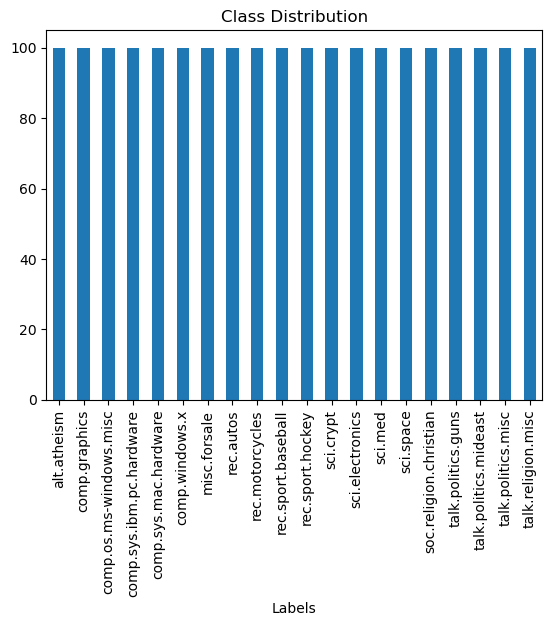

In [13]:
df['Labels'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [24]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\HARSHIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\HARSHIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to C:\Users\HARSHIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HARSHIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


In [26]:
def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", str(text))   # keep only letters
    text = text.lower()                            # lowercase
    tokens = nltk.word_tokenize(text)              # tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

In [27]:
# Apply cleaning
df["clean_text"] = df["Data"].apply(clean_text)

print(df[["Data","clean_text"]].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                          clean_text  
0  path cantaloupe srv cmu edu magnesium club cmu...  
1  newsgroups alt atheism path cantaloupe srv cmu...  
2  path cantaloupe srv cmu edu da news harvard ed...  
3  path cantaloupe srv cmu edu magnesium club cmu...  
4  xref cantaloupe srv cmu edu alt atheism talk r...  


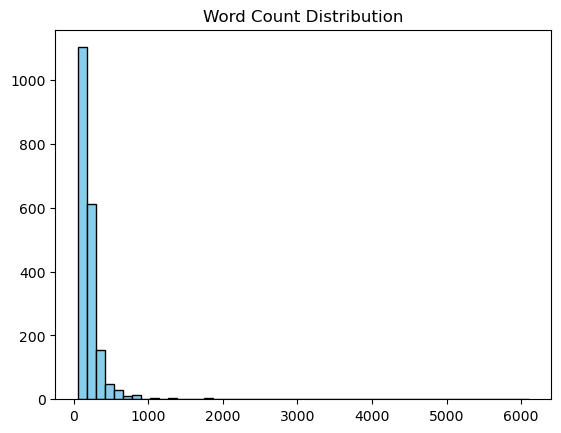

In [28]:
# Word count distribution
df["word_count"] = df["clean_text"].apply(lambda x: len(x.split()))
plt.hist(df["word_count"], bins=50, color="skyblue", edgecolor="black")
plt.title("Word Count Distribution")
plt.show()


In [30]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


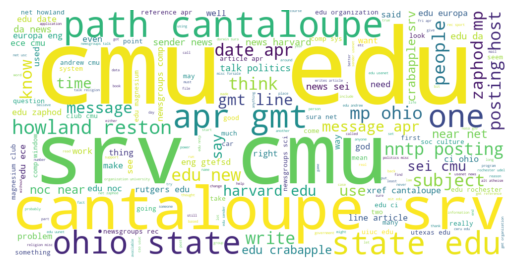

In [31]:
from wordcloud import WordCloud

all_text = " ".join(df["clean_text"])
wc = WordCloud(width=1000, height=500, background_color="white").generate(all_text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,3))  # unigrams + bigrams
X = tfidf.fit_transform(df["clean_text"]).toarray()
y = df["Labels"]

print("TF-IDF Shape:", X.shape)


TF-IDF Shape: (2000, 10000)


In [42]:
from sklearn.model_selection import train_test_split

# X = TF-IDF features (from earlier step)
# y = categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (1600, 10000)
Test size : (400, 10000)


In [43]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB() 
nb_model.fit(X_train, y_train)


MultinomialNB()

In [44]:
y_pred = nb_model.predict(X_test)
y_pred

array(['sci.crypt', 'sci.med', 'talk.politics.mideast',
       'soc.religion.christian', 'talk.politics.guns', 'sci.med',
       'comp.windows.x', 'rec.motorcycles', 'talk.politics.mideast',
       'comp.graphics', 'comp.sys.mac.hardware', 'alt.atheism',
       'talk.politics.guns', 'rec.sport.baseball', 'rec.autos',
       'misc.forsale', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
       'sci.med', 'misc.forsale', 'sci.electronics', 'sci.electronics',
       'rec.autos', 'rec.sport.baseball', 'sci.space', 'sci.electronics',
       'rec.autos', 'talk.politics.guns', 'misc.forsale', 'sci.med',
       'sci.electronics', 'talk.religion.misc', 'comp.graphics',
       'rec.sport.hockey', 'comp.sys.ibm.pc.hardware',
       'comp.sys.ibm.pc.hardware', 'sci.electronics',
       'comp.os.ms-windows.misc', 'rec.sport.hockey', 'rec.motorcycles',
       'talk.religion.misc', 'rec.autos', 'comp.sys.ibm.pc.hardware',
       'talk.politics.mideast', 'talk.politics.misc', 'rec.sport.hockey',
     

Accuracy: 0.905

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.92      0.60      0.73        20
           comp.graphics       0.90      0.90      0.90        20
 comp.os.ms-windows.misc       0.95      1.00      0.98        20
comp.sys.ibm.pc.hardware       0.90      0.95      0.93        20
   comp.sys.mac.hardware       1.00      0.90      0.95        20
          comp.windows.x       0.95      0.90      0.92        20
            misc.forsale       0.90      0.95      0.93        20
               rec.autos       0.87      1.00      0.93        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.95      0.95      0.95        20
        rec.sport.hockey       0.95      1.00      0.98        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       1.00      0.85      0.92        20
                 sci.med       0.9

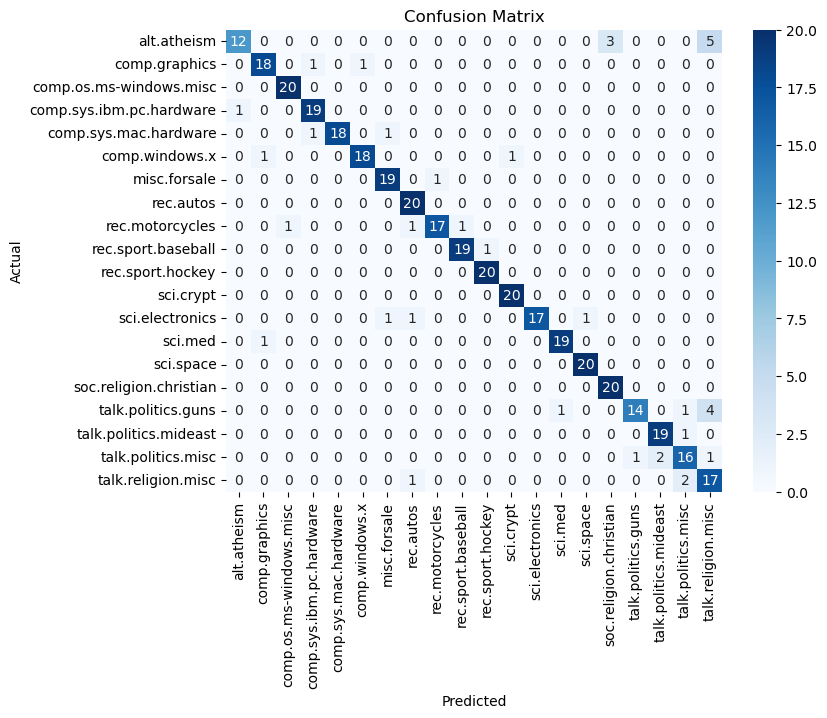

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.893


In [ ]:
#Sentiment Analysis

In [47]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to C:\Users\HARSHIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...


In [48]:
def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["Data"].apply(get_sentiment)
print(df[["Data","sentiment"]].head())


                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


C:\Users\HARSHIT SINGH\AppData\Local\Temp\ipykernel_1440\1630937382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, order=df["sentiment"].value_counts().index, palette="Set2")


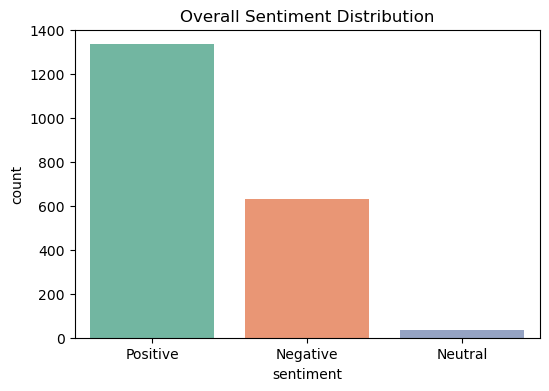

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, order=df["sentiment"].value_counts().index, palette="Set2")
plt.title("Overall Sentiment Distribution")
plt.show()

In [51]:
# grouping as per category
sent_summary = df.groupby(["Labels","sentiment"]).size().unstack(fill_value=0)
print(sent_summary)

sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     42        1        57
comp.graphics                   13        4        83
comp.os.ms-windows.misc         24        2        74
comp.sys.ibm.pc.hardware        21        0        79
comp.sys.mac.hardware           24        3        73
comp.windows.x                  20        2        78
misc.forsale                     7        8        85
rec.autos                       27        1        72
rec.motorcycles                 30        2        68
rec.sport.baseball              27        1        72
rec.sport.hockey                28        1        71
sci.crypt                       29        0        71
sci.electronics                 18        4        78
sci.med                         38        1        61
sci.space                       32        3        65
soc.religion.christian          29        0        71
talk.politics.guns          

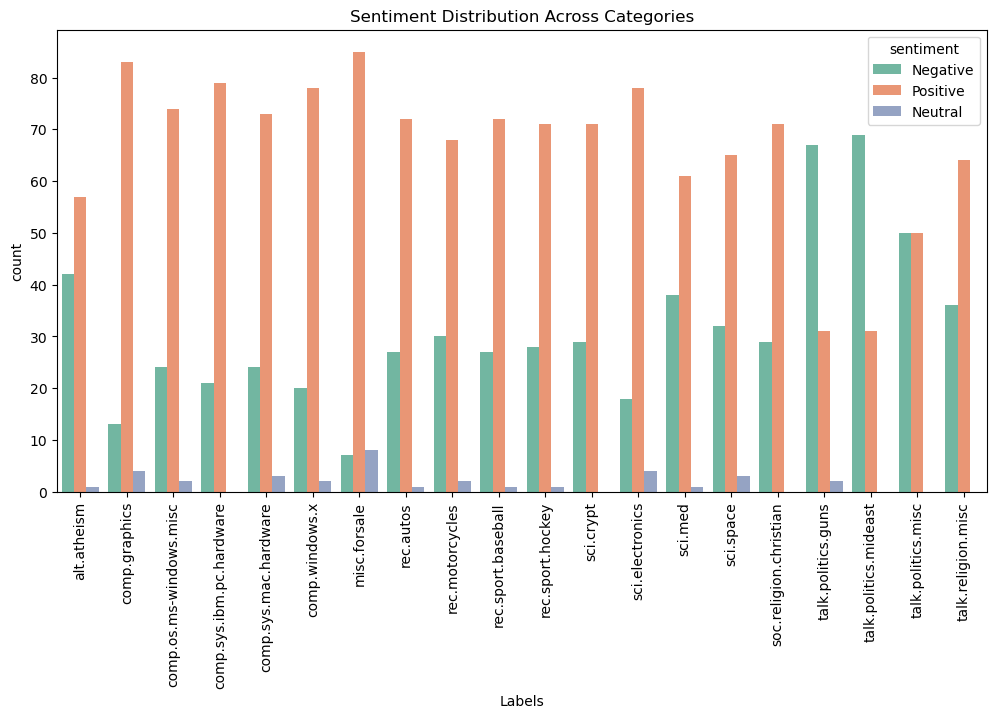

In [52]:
#visual representation of above grouping data 
plt.figure(figsize=(12,6))
sns.countplot(x="Labels", hue="sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution Across Categories")
plt.xticks(rotation=90)
plt.show()